## Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import scipy.stats as stats

In [2]:
nfty = pd.read_csv('/home/docboy/Desktop/5th Year/Option Pricing Work/Work/INDEXVALUE_NIFTY50_2015_2018_combined_raw.csv')
bnfty = pd.read_csv('/home/docboy/Desktop/5th Year/Option Pricing Work/Work/INDEXVALUE_BANKNIFTY_2015_2018_combined_raw.csv')

In [12]:
# Analysis on NIFTY Close Price
k = np.log(nfty.loc[:, 'Close']/nfty.loc[:, 'Close'].shift(1) )
k = k.dropna()

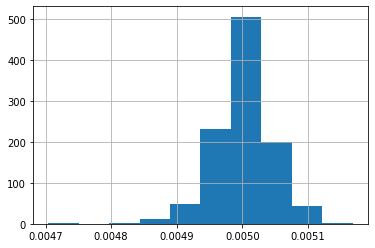

In [34]:
l = (1/200*(nfty.loc[:, "Close"]/nfty.loc[:, "Close"].shift(1)))
l.hist()

In [29]:
(np.sqrt((1/250)*np.var((nfty.loc[:, "Close"]))))**2

5380.546155109285

In [4]:
# Analysis on BANKNIFTY Close Price
j = np.log(bnfty.loc[:, 'Close']/bnfty.loc[:, 'Close'].shift(1))
j = j.dropna()

In [5]:
plt.rcParams['figure.figsize'] = [15, 10]

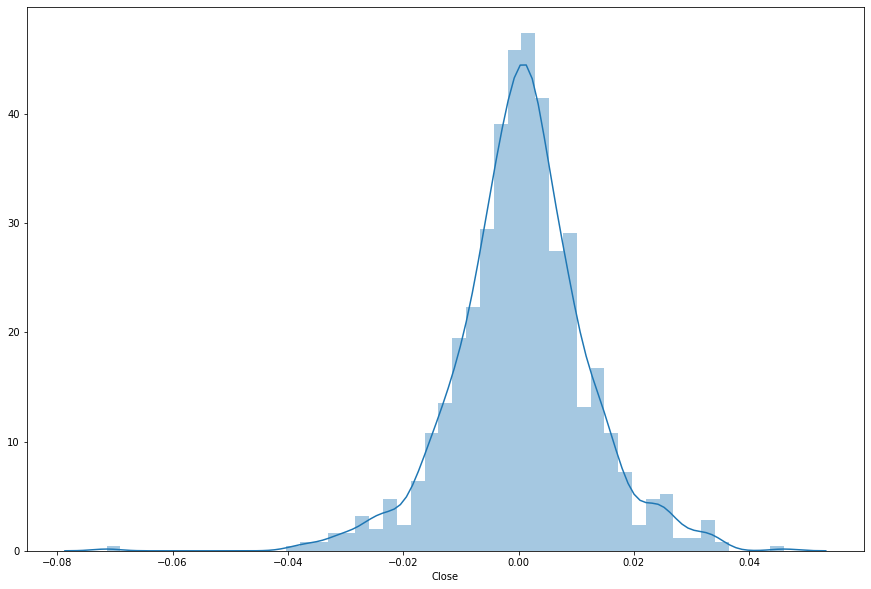

In [6]:
sns.distplot(j)

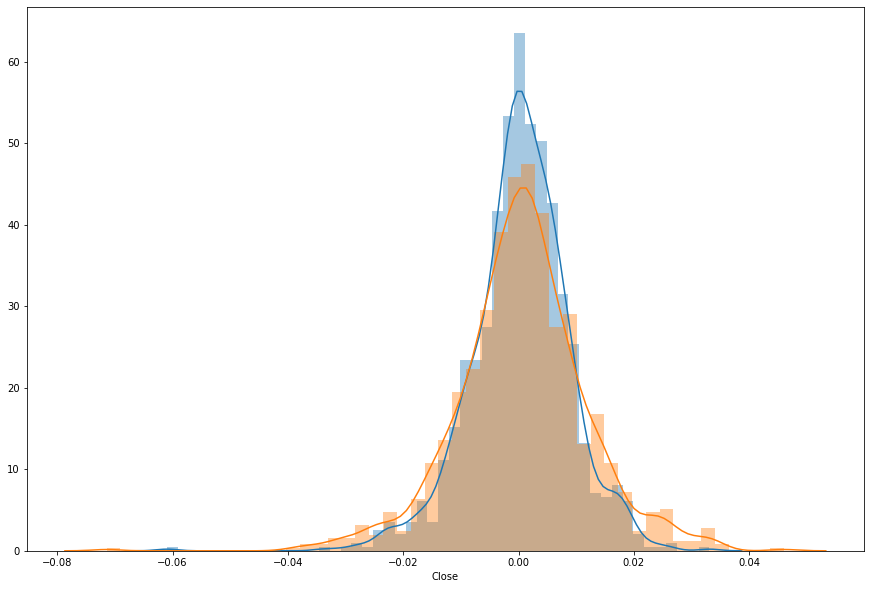

In [7]:
sns.distplot(k);sns.distplot(j)

In [8]:
df = pd.DataFrame({'BANKNIFTY' : j,
                  'NIFTY50' : k})
# df

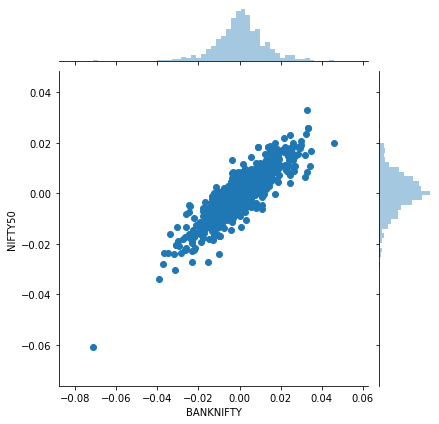

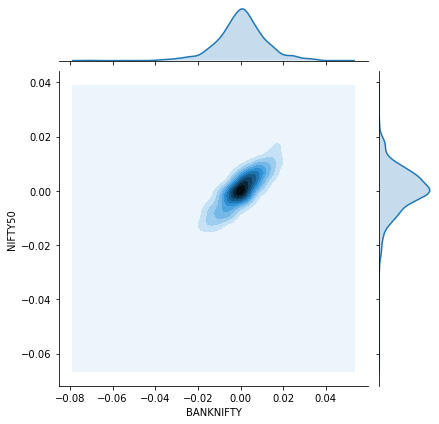

In [11]:
sns.jointplot(x="BANKNIFTY", y="NIFTY50", data=df);sns.jointplot(x="BANKNIFTY", y="NIFTY50", data=df, kind="kde");

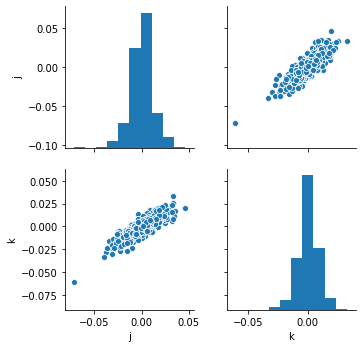

In [10]:
sns.pairplot(df)

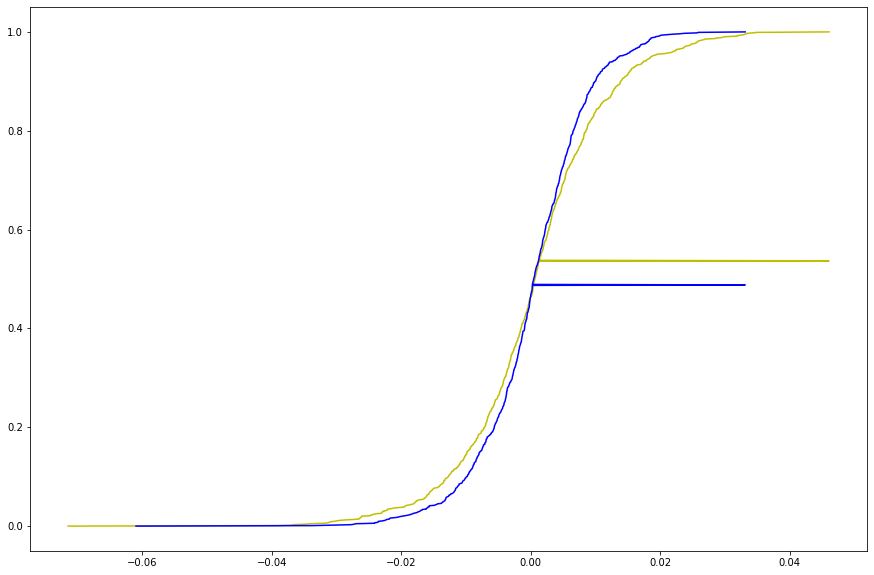

In [11]:
# ECDF of k
k_ser = k.sort_values()
k_ser[len(k_ser)] = k_ser.iloc[-1]
cum_dist = np.linspace(0.,1.,len(k_ser))
ser_cdf = pd.Series(cum_dist, index=k_ser)



# ser_cdf.plot(drawstyle='steps')
j_ser = j.sort_values()
j_ser[len(j_ser)] = j_ser.iloc[-1]
jum_dist = np.linspace(0.,1.,len(j_ser))
jer_cdf = pd.Series(jum_dist, index=j_ser)
# jer_cdf.plot()

plt.plot(jer_cdf, 'y') # plotting t, a separately 
plt.plot(ser_cdf, 'b') # plotting t, b separately 

plt.show()

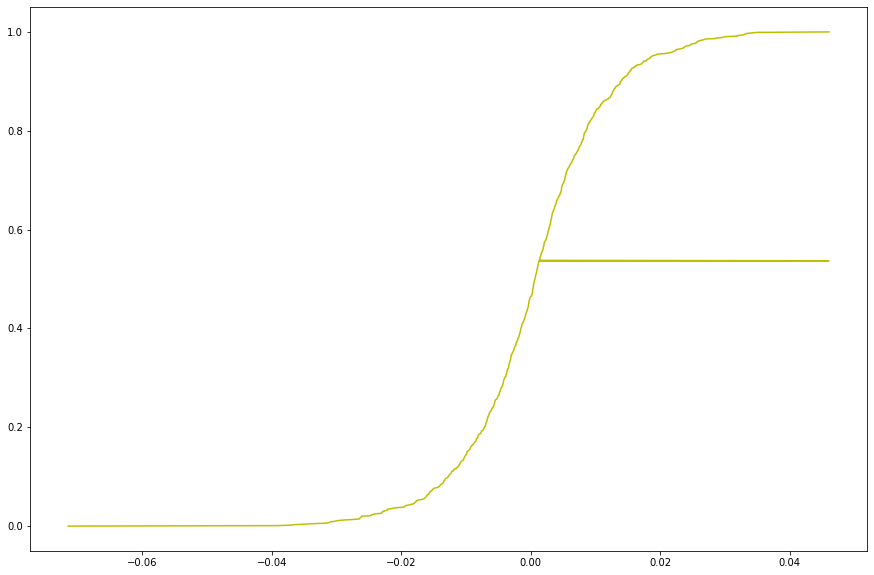

In [12]:
plt.plot(jer_cdf, 'y')

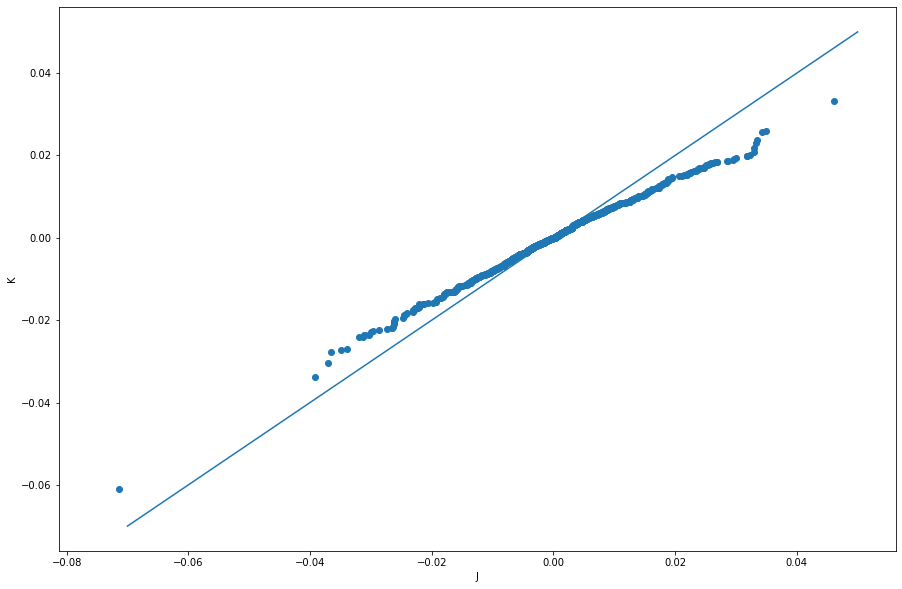

In [13]:
# Quantile-quantile plot
x = np.linspace(-0.07,0.05,100)
y = x
plt.figure()
plt.scatter(np.sort(j), np.sort(k))
plt.xlabel('J')
plt.ylabel('K')
plt.plot(x,y)
plt.show()

plt.close()

In [14]:
h = {'j':j, 'k':k}

l = pd.DataFrame(h)
l

,j,k
1,-0.008916,-0.011793
2,0.010729,-0.001236
3,0.025557,0.014915
4,-0.018427,-0.012718
5,0.014372,0.003087
6,0.004712,-0.002572
7,-0.013418,-0.014835
8,0.024671,0.004057
9,0.017844,0.012734
10,0.012906,0.006118


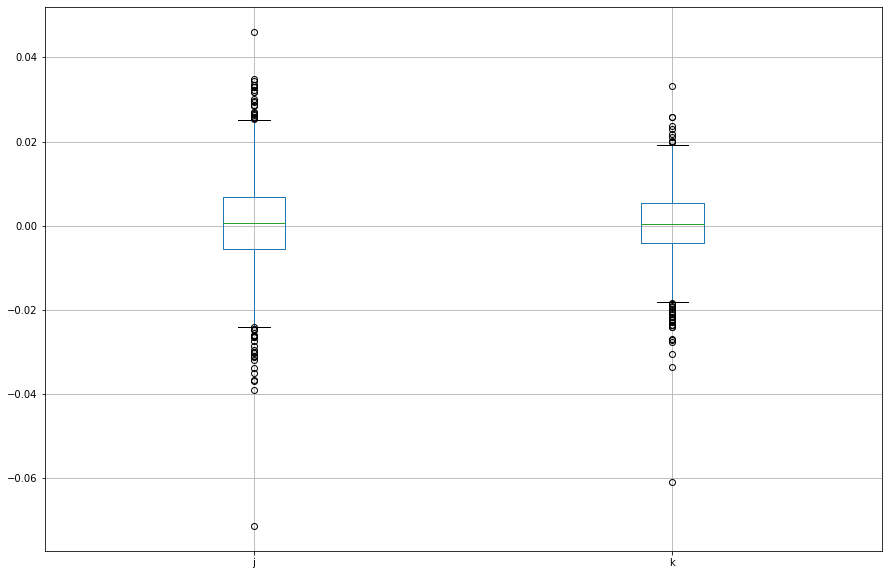

In [16]:
l.boxplot()


In [17]:
nf = pd.read_csv('/home/docboy/Desktop/new_expt/NIFTY50_feature_set_FINAL_ecdf.csv')
bnf = pd.read_csv('/home/docboy/Desktop/new_expt/BANKNIFTY_feature_set_FINAL_ecdf.csv')

In [18]:
dropNames = ['date', 'percentage', 'repoRate', 'yield1', 'yield03', 'ttm', 'atmError', 'Target']
nf = nf.drop(dropNames, axis = 1)    
bnf = bnf.drop(dropNames, axis = 1)    


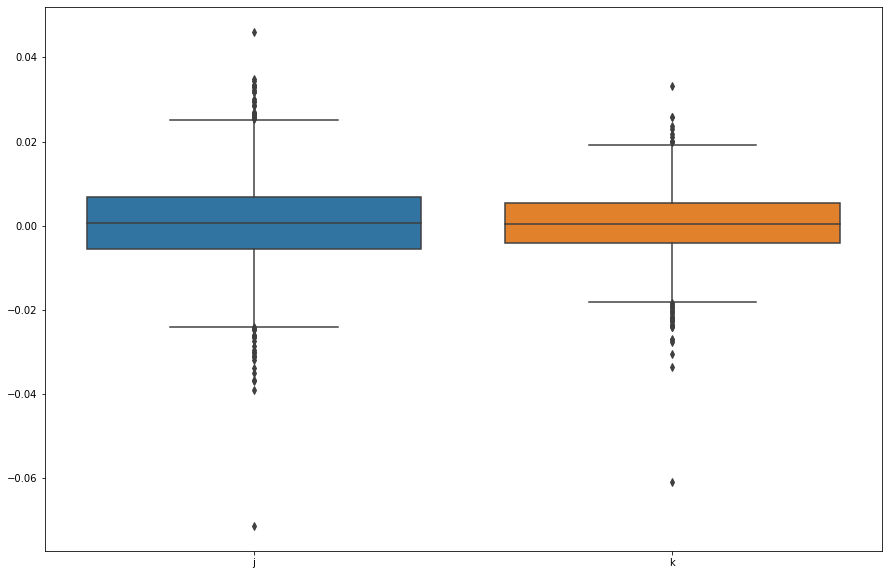

In [27]:
sns.boxplot(data=l)

Text(0.5, 1.0, 'NF')

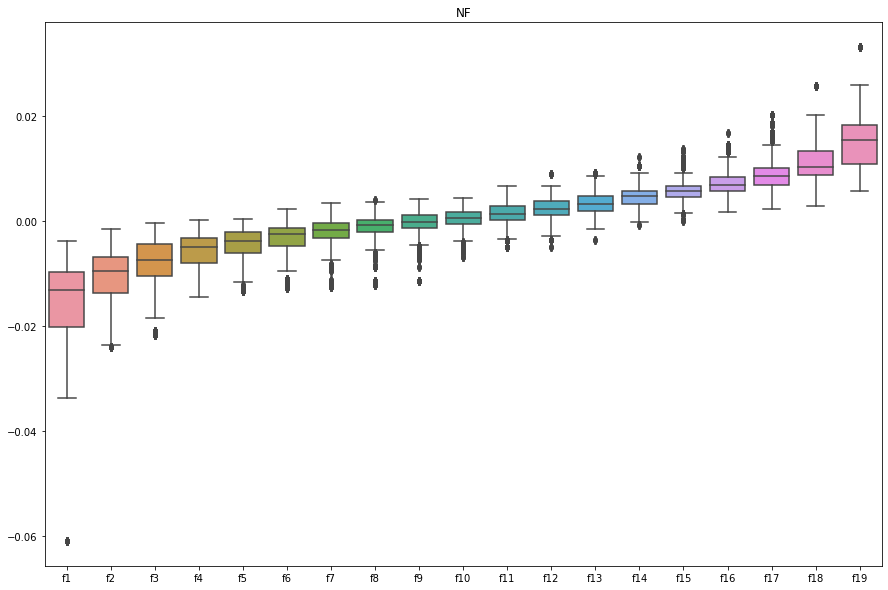

In [24]:
sns.boxplot(data=nf)
plt.title('NF')

Text(0.5, 1.0, 'BNF')

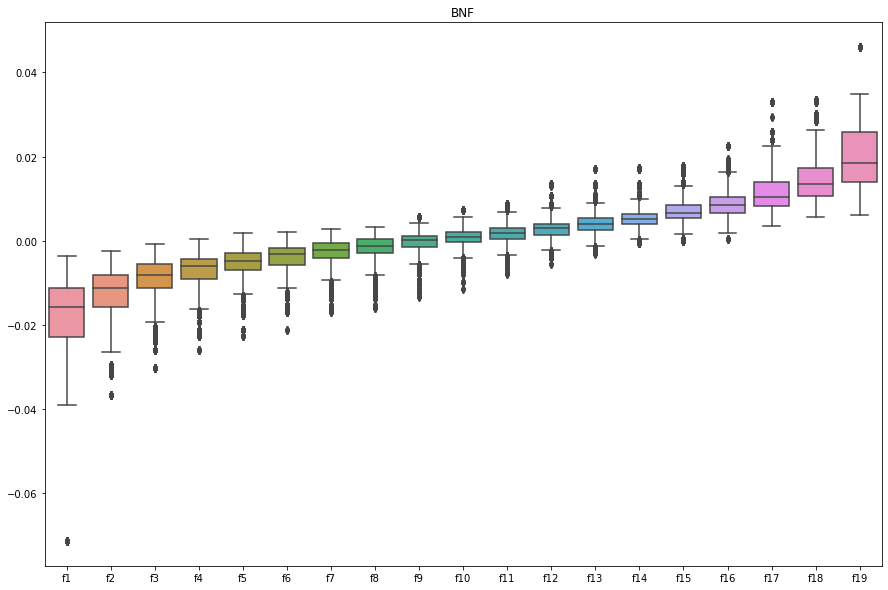

In [26]:
sns.boxplot(data=bnf)
# sns.stripplot(data=bnf)
plt.title('BNF')

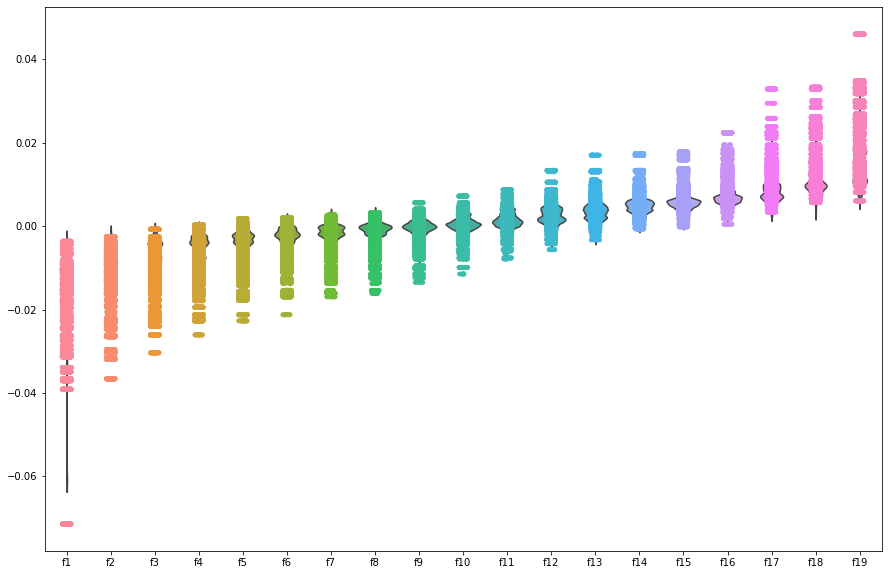

In [19]:
sns.violinplot(data=nf)
sns.stripplot(data=bnf)


In [13]:
sns.boxplot(data=nf, color = 'white', saturation = 0.4, width = 0.75, palette='Set2')
sns.boxplot(data=bnf, color = 'yellow', saturation = 0.8, width = 0.55)
plt.title('Combined Box Plot')

NameError: name 'nf' is not defined

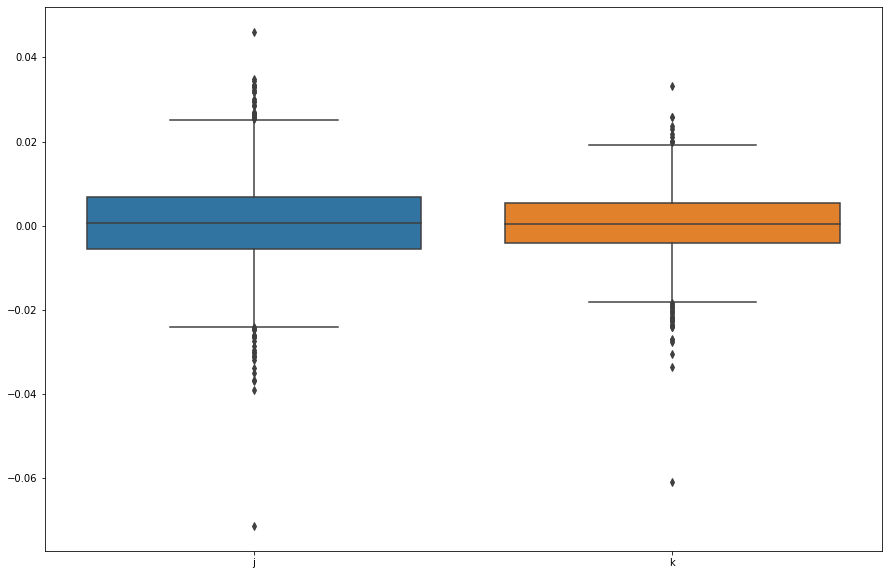

In [30]:
sns.boxplot(data=l)

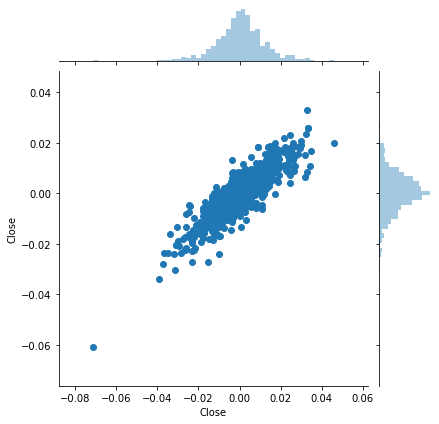

In [29]:
sns.jointplot(j, k)